<a href="https://colab.research.google.com/github/jlpontes/creditFraud-prediction/blob/main/fraud_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Improve graphic visualization
sns.set_style('whitegrid')
%matplotlib inline

In [34]:
df = pd.read_csv('creditcard.csv', on_bad_lines='skip')


/tmp/ipython-input-3416091828.py:1: DtypeWarning: Columns (2,3,4,5,7,9,12,14,17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('creditcard.csv', on_bad_lines='skip')


In [35]:
df.head()




,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338320769942518,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.16648,0.448154,0.0600176492822243,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.37978,-0.503198133318193,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.0103088796030823,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193377311653,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [62]:
df.tail()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
529784,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0.0
529785,172787.0,-0.732789,-0.05508,2.03503,-0.738589,0.868229,1.058415,0.02433,0.294869,0.5848,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0.0
529786,172788.0,1.919565,-0.301254,-3.24964,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0.0
529787,172788.0,-0.240440,0.530483,0.70251,0.689799,-0.377961,0.623708,-0.68618,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0.0
529788,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.48618,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0.0


In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529789 entries, 0 to 529788
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    529789 non-null  float64
 1   V1      529789 non-null  float64
 2   V2      529789 non-null  object 
 3   V3      529788 non-null  object 
 4   V4      529787 non-null  object 
 5   V5      529786 non-null  object 
 6   V6      529786 non-null  float64
 7   V7      529783 non-null  object 
 8   V8      529781 non-null  float64
 9   V9      529780 non-null  object 
 10  V10     529779 non-null  float64
 11  V11     529777 non-null  float64
 12  V12     529775 non-null  object 
 13  V13     529771 non-null  float64
 14  V14     529769 non-null  object 
 15  V15     529765 non-null  float64
 16  V16     529759 non-null  float64
 17  V17     529755 non-null  object 
 18  V18     529751 non-null  float64
 19  V19     529744 non-null  float64
 20  V20     529741 non-null  object 
 21  V21     52

In [37]:
df.describe()


,Time,V1,V6,V8,V10,V11,V13,V15,V16,V18,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5.297890e+05,529789.000000,529786.000000,5.297810e+05,529779.000000,529777.000000,529771.000000,529765.000000,529759.000000,529751.000000,...,529732.000000,5.297260e+05,5.297200e+05,529711.000000,529708.000000,529704.000000,529696.000000,529687.000000,529680.000000,529673.000000
mean,2.685282e+12,0.016342,-0.007442,5.899960e+07,0.005456,-0.031515,-0.018427,-0.006862,0.000950,0.006840,...,0.002855,-1.833878e+07,-7.367635e+03,-0.000239,-0.009739,-0.000384,0.001018,-0.000028,88.394727,0.001661
std,1.949830e+15,1.971735,1.337462,4.294344e+10,1.089095,1.009604,0.989091,0.945772,0.962485,0.838602,...,0.781069,1.334738e+10,5.362305e+06,0.618158,0.547880,0.862704,0.734374,0.346940,251.142320,0.040726
min,0.000000e+00,-56.407510,-26.160506,-7.321672e+01,-24.588262,-4.797473,-20.794422,-4.498945,-20.794422,-9.498746,...,-34.830382,-9.714530e+12,-3.902785e+09,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,6.107900e+04,-0.916656,-0.777201,-2.127964e-01,-0.533757,-0.786614,-0.656307,-0.589879,-0.466399,-0.493917,...,-0.227658,-5.429291e-01,-1.604073e-01,-0.356498,-0.328041,-0.326695,-0.071220,-0.054326,5.490000,0.000000
50%,9.727500e+04,0.026078,-0.283628,1.999425e-02,-0.089778,-0.060478,-0.025669,0.035974,0.066669,0.001973,...,-0.025008,1.580473e-02,-7.617860e-03,0.039607,-0.000225,-0.051136,0.000802,0.009741,21.990000,0.000000
75%,1.413660e+05,1.368150,0.390795,3.284114e-01,0.460092,0.704064,0.640712,0.636809,0.520736,0.508073,...,0.192044,5.471278e-01,1.536587e-01,0.444805,0.343537,0.237771,0.091524,0.078485,77.000000,0.000000
max,1.419211e+18,99.000000,73.301626,3.125684e+13,57.880000,64.200000,84.640000,179.790000,233.600000,41.710000,...,155.150000,3.790390e+03,2.252841e+01,59.360000,93.340000,507.860000,368.900000,46.970000,25691.160000,1.000000


In [39]:
print(df['Class'].value_counts())

Class
0.0    528793
1.0       880
Name: count, dtype: int64


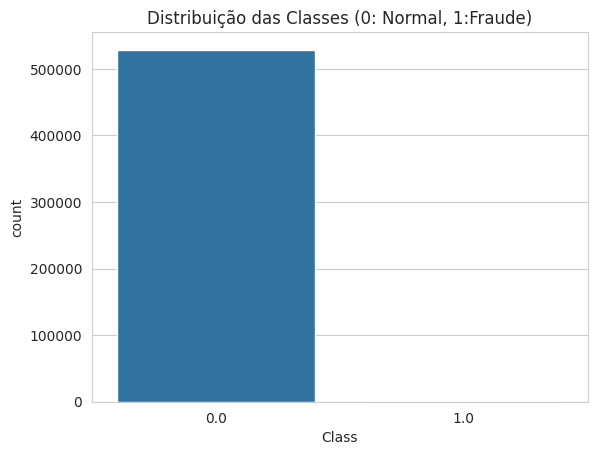

In [41]:
sns.countplot(x='Class', data=df)
plt.title('Distribuição das Classes (0: Normal, 1:Fraude)')
plt.show()

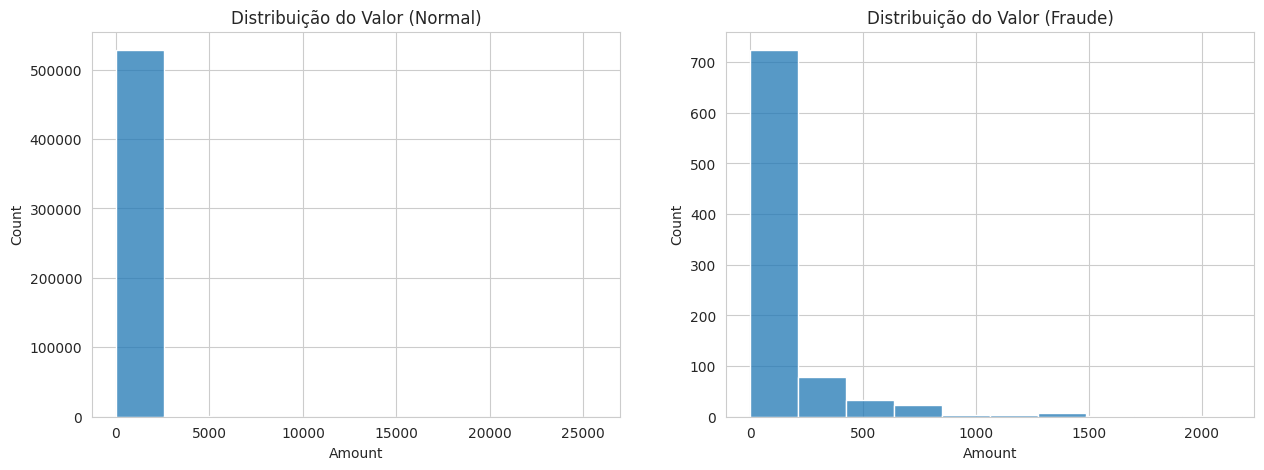

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=10, ax=ax1).set_title('Distribuição do Valor (Normal)')
sns.histplot(df[df['Class'] == 1]['Amount'], bins=10, ax=ax2).set_title('Distribuição do Valor (Fraude)')
plt.show()
# O que você observa? As escalas são muito diferentes?
# Mais transacoes e mais fraudes de pequenos valores

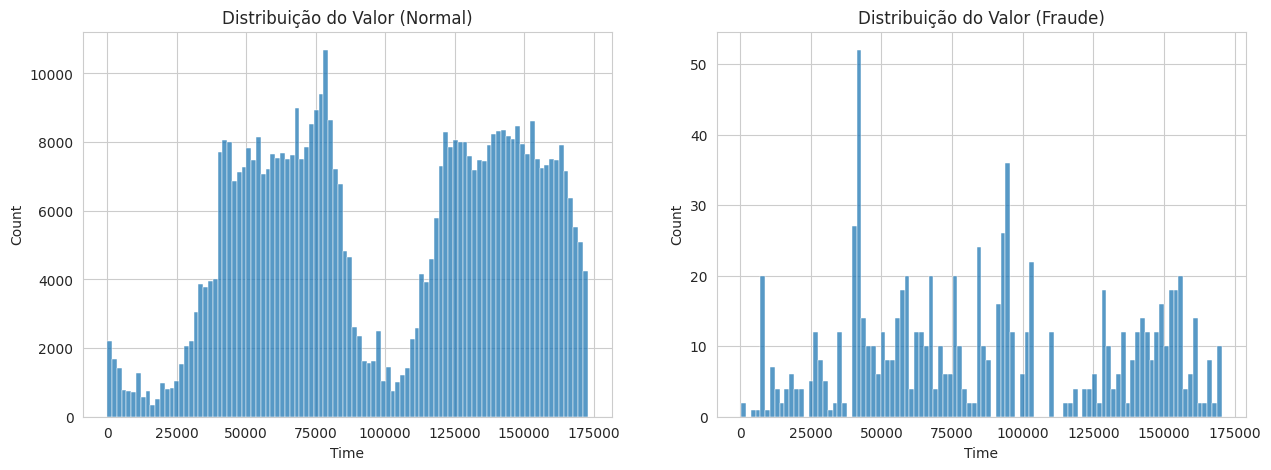

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df[df['Class'] == 0]['Time'], bins=100, ax=ax1).set_title('Distribuição do Valor (Normal)')
sns.histplot(df[df['Class'] == 1]['Time'], bins=100, ax=ax2).set_title('Distribuição do Valor (Fraude)')
plt.show()
# O que você observa? As escalas são muito diferentes?
#

In [70]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = pd.to_numeric(df[col], errors='coerce')

correlation_matrix = df.corr()
# Mostra a correlação de todas as colunas com 'Class', ordenado do maior para o menor
print(correlation_matrix['Class'].sort_values(ascending=False))

Class     1.000000
V11       0.147623
V4        0.126745
V2        0.082997
V21       0.040146
V19       0.035146
V20       0.017936
V27       0.009619
V28       0.008975
V8        0.006462
Amount    0.005975
V26       0.003279
V22       0.002688
V25       0.001641
V23      -0.000496
V15      -0.004228
V24      -0.006039
V13      -0.006271
Time     -0.011026
V6       -0.039337
V5       -0.085793
V1       -0.092138
V9       -0.094757
V18      -0.106509
V7       -0.175952
V3       -0.177139
V16      -0.189312
V10      -0.209141
V12      -0.258368
V14      -0.294482
V17      -0.318729
Name: Class, dtype: float64


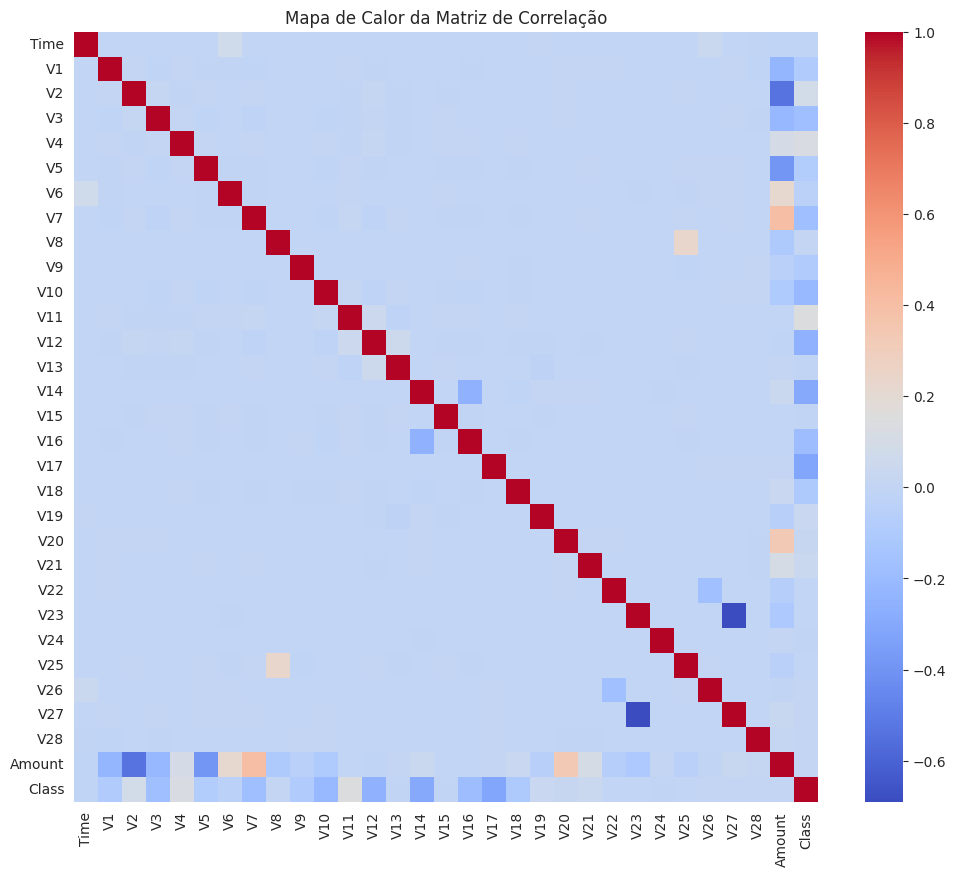

In [72]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.1f')
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Drop rows with any missing values after converting to numeric
df.dropna(inplace=True)

# 2. Separar features (X) e alvo (y)
X = df.drop('Class', axis=1)
y = df['Class']

# 3. Dividir os dados em conjuntos de treino e teste
# Usamos stratify=y para garantir que a proporção de fraudes seja a mesma nos dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('Dados de treino:', X_train.shape)
print('Dados de teste:', X_test.shape)
print('Proporção de fraude no treino:', round(y_train.value_counts(normalize=True)[1]*100, 2), '%')
print('Proporção de fraude no teste:', round(y_test.value_counts(normalize=True)[1]*100, 2), '%')

Dados de treino: (423737, 30)
Dados de teste: (105935, 30)
Proporção de fraude no treino: 0.17 %
Proporção de fraude no teste: 0.17 %


In [77]:
from sklearn.linear_model import LogisticRegression

# 1. Instanciar o modelo
# Usamos 'random_state' para garantir que os resultados sejam reprodutíveis
# 'max_iter' aumentado para garantir que o modelo tenha "tempo" suficiente para aprender
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# 2. Treinar o modelo com os dados de TREINO!
print("Treinando o modelo de Regressão Logística...")
lr_model.fit(X_train, y_train)
print("Treinamento concluído!")

Treinando o modelo de Regressão Logística...
Treinamento concluído!


In [78]:
from sklearn.metrics import accuracy_score

# Fazer previsões nos dados de teste
y_pred_lr = lr_model.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Acurácia do modelo: {accuracy * 100:.2f}%")

Acurácia do modelo: 99.93%


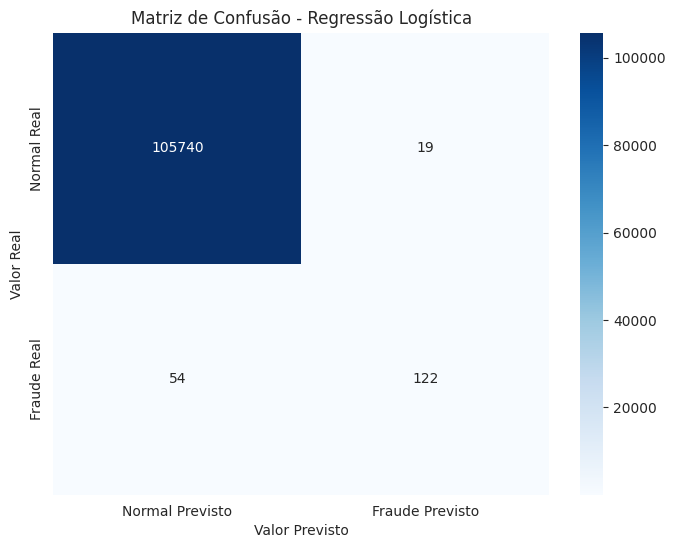


Relatório de Classificação:
              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00    105759
  Fraude (1)       0.87      0.69      0.77       176

    accuracy                           1.00    105935
   macro avg       0.93      0.85      0.88    105935
weighted avg       1.00      1.00      1.00    105935



In [79]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Gerar a Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_lr)

# Visualizar a Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal Previsto', 'Fraude Previsto'],
            yticklabels=['Normal Real', 'Fraude Real'])
plt.title('Matriz de Confusão - Regressão Logística')
plt.ylabel('Valor Real')
plt.xlabel('Valor Previsto')
plt.show()

# Gerar o Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_lr, target_names=['Normal (0)', 'Fraude (1)']))

Treinando o modelo Random Forest... (Isso pode demorar um pouco mais)
Treinamento concluído!

--- Resultados do Random Forest ---


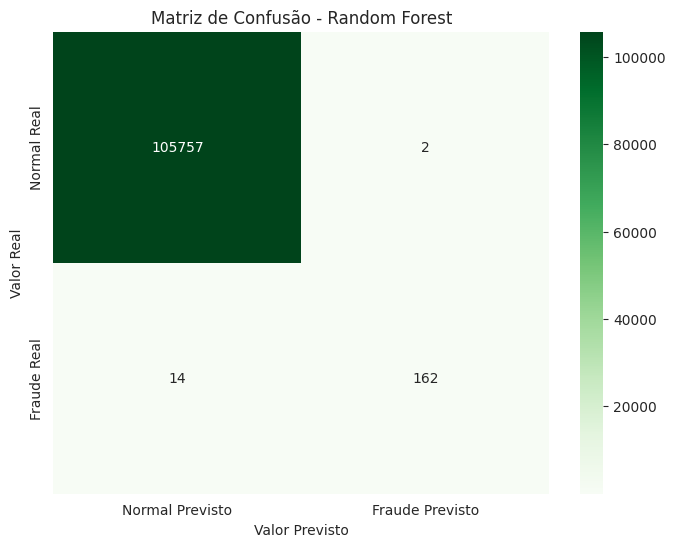


Relatório de Classificação - Random Forest:
              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00    105759
  Fraude (1)       0.99      0.92      0.95       176

    accuracy                           1.00    105935
   macro avg       0.99      0.96      0.98    105935
weighted avg       1.00      1.00      1.00    105935



In [80]:
from sklearn.ensemble import RandomForestClassifier

# 1. Instanciar o modelo especialista
# n_estimators = número de "árvores/detetives" no nosso comitê
# random_state para reprodutibilidade
# n_jobs=-1 usa todos os processadores do seu computador para acelerar o treino
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# 2. Treinar o modelo
print("Treinando o modelo Random Forest... (Isso pode demorar um pouco mais)")
rf_model.fit(X_train, y_train)
print("Treinamento concluído!")

# 3. Fazer previsões
y_pred_rf = rf_model.predict(X_test)

# 4. Avaliar o especialista
print("\n--- Resultados do Random Forest ---")

# Gerar a Matriz de Confusão
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Normal Previsto', 'Fraude Previsto'],
            yticklabels=['Normal Real', 'Fraude Real'])
plt.title('Matriz de Confusão - Random Forest')
plt.ylabel('Valor Real')
plt.xlabel('Valor Previsto')
plt.show()

# Gerar o Relatório de Classificação
print("\nRelatório de Classificação - Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=['Normal (0)', 'Fraude (1)']))

In [81]:
import joblib

# O modelo que você treinou (rf_model) está na memória. Vamos salvá-lo em um arquivo.
filename = 'fraud_model.joblib'

print(f"Salvando o modelo no arquivo: {filename}...")
joblib.dump(rf_model, filename)
print("Modelo salvo com sucesso!")

# --- Teste Rápido (Opcional, mas recomendado) ---
# Vamos ver se conseguimos carregar o cérebro de volta e se ele ainda funciona.
print("\nCarregando o modelo de volta para um teste...")
loaded_model = joblib.load(filename)
print("Modelo carregado com sucesso!")

# Verificando se o modelo carregado ainda produz os mesmos resultados
result = loaded_model.score(X_test, y_test)
print(f"Acurácia do modelo carregado no teste: {result*100:.2f}%")

Salvando o modelo no arquivo: fraud_model.joblib...
Modelo salvo com sucesso!

Carregando o modelo de volta para um teste...
Modelo carregado com sucesso!
Acurácia do modelo carregado no teste: 99.98%
